# InternImage  
internimage  
https://arxiv.org/pdf/2211.05778.pdf  
https://inha-kim.tistory.com/65  

Vision 분야에서 Transformer 모델이 좋은 성능을 보이고 있고 이를 따라잡을만한 CNN 모델이 많이 없음  



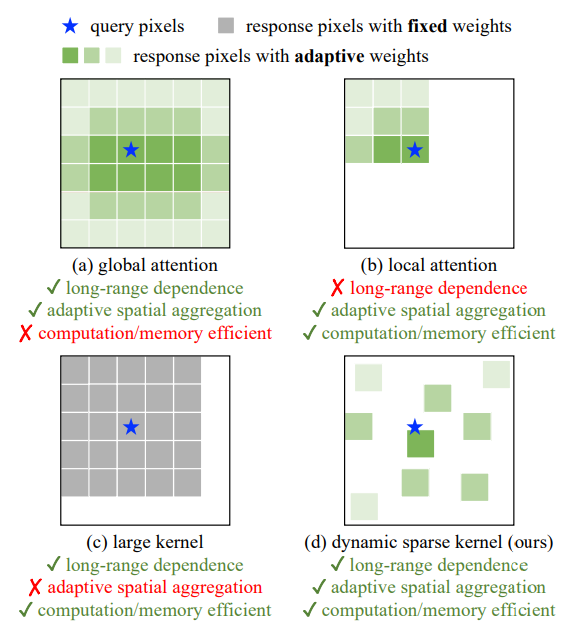

Large vision model 의 core operation  

local attention, large kernel 등의 방법을 활용한 모델들이 있었지만 large scale ViT에 비해 성능이 좋지 않았음  

저자들은 Deformable Convolution을 이용하여 Transformer와 유사한 구조로 internimage 를 만듬  

3x3 DCNv3 를 이용하여 위의 특성들을 모두 챙김

## DCNv3

**CNN vs MHSA**  
1. Long-range dependencies  
 - effective receptive field 가 큰 model이 대게 downstream task 에서 잘 수행된다고 인식되어짐
 - 3x3 conv 를 이용한 effective receptive field는 상대적으로 작고 층을 깊게해도 ViT 만큼 long-range dependencies 를 가질 수 없음
2. Adaptive spatial aggregation  
 - input에 의해 dynamic 하게 weight가 조정되는 MHSA 와 달리 static weight 을 가진 conv 은 강한 inductive bias 를 가짐(2D locality, neighborhood structure, translation equivalence)
 - 이런 특성덕에 cnn 은 더 ViT보다 빠르게 수렴할 수 있지만 web-scale data 에서 general and robust 한 특징을 학습하는 것을 제한하기도 함

**Deformable Convolution**

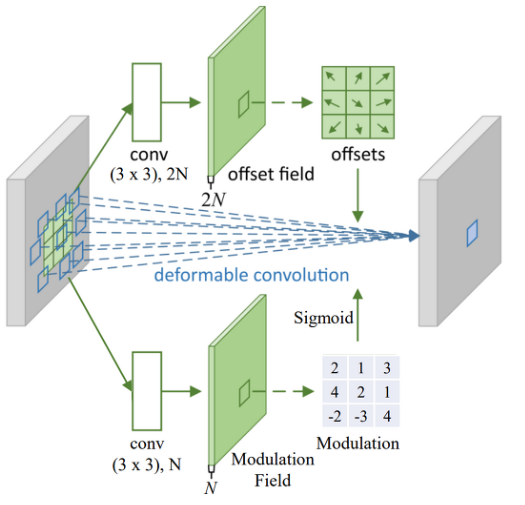

v1 :  
$ y(p_0) = \sum_{p_n\in ℛ} w(p_n) \cdot x(p_0 + p_n + Δp_n)$  
v2 :  
$ y(p_0) = \sum_{p_n\in ℛ} w(p_n) \cdot m(p_n) \cdot x(p_0 + p_n + Δp_n)$
DCNv2 까지는 일반적으로 convolution으로 pre train 된 가중치를 load 한 후 fine-tuning  

v3 :  
$ y(p_0) = \sum_{g\in 𝐆}\sum_{p_k\in ℛ} w(p_g) \cdot m(p_{gk}) \cdot x_g(p_0 + p_k + Δp_{gk})$  

**1. Sharing weights among convolutional neurons**
 - 가중치 W_k 를 depth-wise part 와 point-wise part 로 나눠 large-scale model을 효율적으로 만들도록 함
 - original location-aware modulation scalar $m_k$, shared projection weights $w$  

**2. Multi-group mechanism**
 - spatial aggregation process 를 G group 으로 분할 각각은 individual sampling offset $Δp_{gk}$ 와 modulation scale $m_{gk}$
 - 따라서 single layer의 서로 다른 그룹들은 다른 spatial aggregatoin pattern을 가지며 downstream task에 강한 feature 를 얻을 수 있음  

**3. Normalizing modulation scalars along sampling points**  
 - v2 에서는 sigmoid를 이용하여 nomalizing 했기 때문에 sum of modulation scalar 가 unstable 하여 학습하는 동안 DCNv2 안의 gradient 가 불안정해짐
 - v3 에서는 softmax normaization 으로 변경하여 stable 하게 학습을 진행

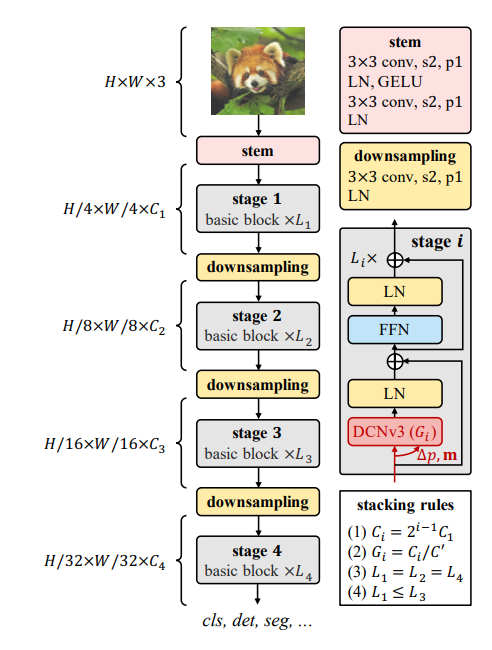

전체 모델 구조   

ViT를 넘어서는 성능을 보여줌

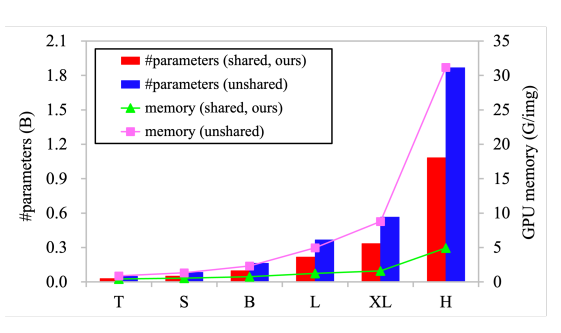

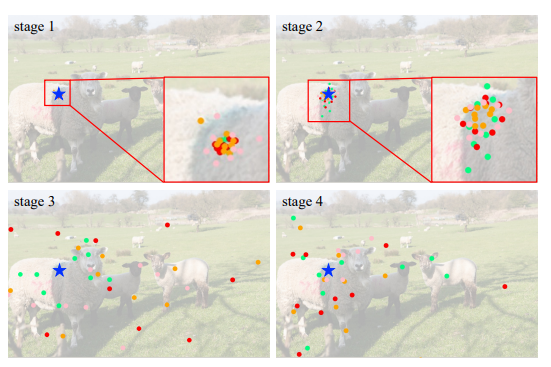

The blue star indicates the query point
(on the left sheep), and the dots with different colors indicate the
sampling locations of different groups

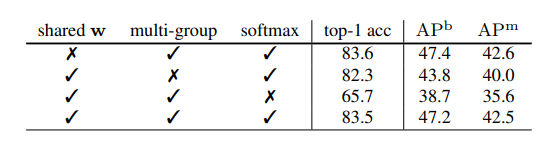

Ablation comparison of the three modifications in DCNv3